# A tutorial on statistical-learning for scientific data processing

## 1、Statistical learning: the setting and the estimator object in scikit-learn

### Datasets

##### A simple example shipped with the scikit: iris dataset

In [1]:
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
data = iris.data

In [4]:
data.shape

(150, 4)

它由150个虹膜观察组成，每个虹膜描述4个特征：萼片和花瓣的长度和宽度

###### An example of reshaping data would be the digits dataset

In [5]:
digits = datasets.load_digits()

In [6]:
digits.images.shape

(1797, 8, 8)

In [7]:
import matplotlib.pyplot as plt

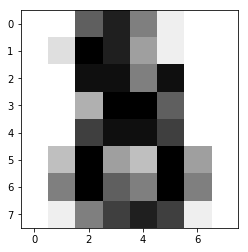

In [8]:
plt.imshow(digits.images[-1],cmap=plt.cm.gray_r)
plt.show()

In [9]:
data = digits.images.reshape((digits.images.shape[0],-1))

### Estimators objects

**拟合数据**：scikit-learn实施的主要API是 估算器。估算器是从数据中学习的任何对象; 它可能是一种分类，回归或聚类算法或从原始数据中提取/过滤有用特征的变换器。

所有估算对象公开一个fit采用数据集的方法（通常是一个二维数组）：

estimator.fit(data)

**估计器参数**：估计器的所有参数可以在实例化时或通过修改相应的属性来设置：

estimator = Estimator(param=1,param=2)

**估计参数**：当数据与估算器相匹配时，参数根据手头数据估算。所有估计的参数都是以下划线结尾的估计对象的属性：

estimator.estimated\_param\_

## 2、Supervised learning:predicting an output variable from high-dimensional observations

### Nearest neighbor and the curse of dimensionality

#### Classifying irises:

In [10]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
np.unique(iris_y)

array([0, 1, 2])

#### K-Nearest neighbors classifier

In [11]:
# Split iris data in train and test data
# A random permutation, to split the data randomly
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train,iris_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
knn.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [13]:
iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

### Linear model:from regression to sparsity

#### Diabetes Dataset

In [14]:
diabetes = datasets.load_diabetes()
diabetes_X_train = diabetes.data[:-20]
diabetes_y_train = diabetes.target[:-20]
diabetes_X_test = diabetes.data[-20:]
diabetes_y_test = diabetes.target[-20:]

#### Linear regression
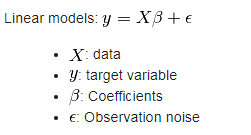

In [15]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train,diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
print(regr.coef_)

[  3.03499549e-01  -2.37639315e+02   5.10530605e+02   3.27736980e+02
  -8.14131709e+02   4.92814588e+02   1.02848452e+02   1.84606489e+02
   7.43519617e+02   7.60951722e+01]


In [17]:
# The mean square error
np.mean((regr.predict(diabetes_X_test)-diabetes_y_test)**2)

2004.5676026898225

In [18]:
# Explained variance score: 1 is perfect prediction
# and 0 means that there is no linear relationship between X and y
regr.score(diabetes_X_test,diabetes_y_test)

0.58507530226905713

**Shrinkage**

If there are few data points per dimension, noise in the observations induces high variance:

In [49]:
X = np.c_[.5,1].T
y = [.5,1]
test = np.c_[0,2].T
regr = linear_model.LinearRegression()

In [50]:
X

array([[ 0.5],
       [ 1. ]])

In [20]:
import matplotlib.pyplot as plt
plt.figure()

In [21]:
np.random.seed(0)
for _ in range(6):
    this_X = .1*np.random.normal(size=(2,1))+X
    regr.fit(this_X,y)
    plt.plot(test,regr.predict(test))
    plt.scatter(this_X,y,s=3)

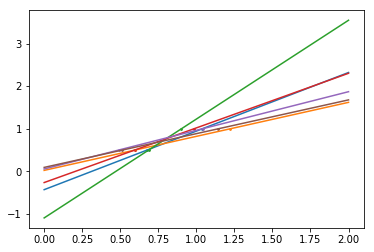

In [22]:
plt.show()

** Ridge regression**

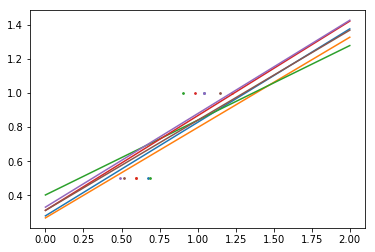

In [23]:
regr = linear_model.Ridge(alpha=.1)
plt.figure()
np.random.seed(0)
for _ in range(6):
    this_X = .1*np.random.normal(size=(2,1))+X
    regr.fit(this_X,y)
    plt.plot(test,regr.predict(test))
    plt.scatter(this_X,y,s=3)
    
plt.show()

岭 alpha参数越大，偏差越高，方差越低。

我们可以选择alpha最小化遗漏误差，这次使用糖尿病数据集而不是我们的综合数据：

In [24]:
alphas = np.logspace(-4, -1, 6)
from __future__ import print_function
print([regr.set_params(alpha=alpha
).fit(diabetes_X_train, diabetes_y_train
).score(diabetes_X_test, diabetes_y_test) for alpha in alphas]) 

[0.58511106838835336, 0.58520730154446765, 0.5854677540698493, 0.58555120365039159, 0.58307170855541623, 0.57058999437280111]


** Sparsity**

In [25]:
regr = linear_model.Lasso()
scores = [regr.set_params(alpha=alpha
 ).fit(diabetes_X_train,diabetes_y_train).score(diabetes_X_test,diabetes_y_test
) for alpha in alphas]

In [26]:
best_alpha = alphas[scores.index(max(scores))]

In [27]:
regr.alpha = best_alpha

In [28]:
regr.fit(diabetes_X_train,diabetes_y_train)

Lasso(alpha=0.025118864315095794, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [29]:
print(regr.coef_)

[   0.         -212.43764548  517.19478111  313.77959962 -160.8303982    -0.
 -187.19554705   69.38229038  508.66011217   71.84239008]


**Classification**

In [30]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(iris_X_train,iris_y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

** Multiclass classification**

** Shrinkage and sparsity with logistic regression**

该C参数控制LogisticRegression对象中正则化的数量 ：对于C较少规则化的结果而言较大的值。 penalty="l2"给出shrinkage（即非稀疏系数），同时 penalty="l1"给出Sparsity。

### support vector machines(SVMs)

** Linear SVMs**

In [31]:
from sklearn import svm

In [32]:
svc = svm.SVC(kernel='linear')

In [33]:
svc.fit(iris_X_train,iris_y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

**Using kernels**

Linear kernel--线性

svc = svm.SVC(kernel='linear')

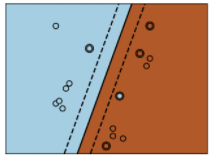

Polynomial kernel--多项式

svc = svm.SVC(kernel='poly',degree=3) 
#degree: polynomial degree

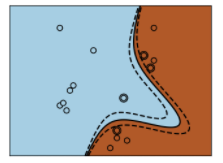

RBF kernel (Radial Basis Function)

svc = svm.SVC(kernel='rbf')--径向基
#gamma: inverse of size ofradial kernel

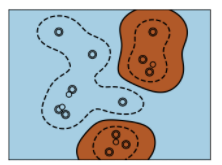

## Model selection:choosing estimators and their parameters

### Score and cross-validated scores

In [34]:
from sklearn import datasets, svm
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target
svc = svm.SVC(C=1, kernel='linear')
svc.fit(X_digits[:-100], y_digits[:-100]).score(X_digits[-100:], y_digits[-100:])

0.97999999999999998

In [35]:
import numpy as np
X_folds = np.array_split(X_digits,3)
y_folds = np.array_split(y_digits,3)
scores = list()
for k in range(3):
    X_train = list(X_folds)
    X_test = X_train.pop(k)
    X_train = np.concatenate(X_train)
    y_train = list(y_folds)
    y_test = y_train.pop(k)
    y_train = np.concatenate(y_train)
    scores.append(svc.fit(X_train,y_train).score(X_test,y_test))

In [36]:
scores

[0.93489148580968284, 0.95659432387312182, 0.93989983305509184]

### Cross-validation generators

In [37]:
from sklearn.model_selection import KFold,cross_val_score
X = ['a','a','b','c','c','c','c']
k_fold = KFold(n_splits=3)
for train_indices,test_indices in k_fold.split(X):
    print('Train:%s | Test:%s' % (train_indices,test_indices))

Train:[3 4 5 6] | Test:[0 1 2]
Train:[0 1 2 5 6] | Test:[3 4]
Train:[0 1 2 3 4] | Test:[5 6]


In [38]:
k_fold.split(X)

<generator object _BaseKFold.split at 0x000000000B0B2DB0>

In [39]:
[svc.fit(X_digits[train],y_digits[train]).score(X_digits[test],y_digits[test]) 
         for train,test in k_fold.split(X_digits)]

[0.93489148580968284, 0.95659432387312182, 0.93989983305509184]

In [40]:
cross_val_score(svc,X_digits,y_digits,cv=k_fold,scoring='precision_macro')

array([ 0.93969761,  0.95911415,  0.94041254])

In [42]:
cross_val_score(svc, X_digits, y_digits, cv=k_fold, n_jobs=-1)

array([ 0.93489149,  0.95659432,  0.93989983])

### Grid-search and cross-validated estimators

** Grid-search**

In [45]:
from sklearn.model_selection import GridSearchCV, cross_val_score
Cs = np.logspace(-6, -1, 10)
clf = GridSearchCV(estimator=svc, param_grid=dict(C=Cs),n_jobs=-1)
clf.fit(X_digits[:1000],y_digits[:1000])

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.00000e-06,   3.59381e-06,   1.29155e-05,   4.64159e-05,
         1.66810e-04,   5.99484e-04,   2.15443e-03,   7.74264e-03,
         2.78256e-02,   1.00000e-01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [46]:
clf.best_score_

0.92500000000000004

In [47]:
clf.best_estimator_.C

0.0077426368268112772

In [48]:
clf.score(X_digits[1000:],y_digits[1000:])

0.94353826850690092

** Nested cross-validation**

In [51]:
cross_val_score(clf,X_digits,y_digits)

array([ 0.93853821,  0.96327212,  0.94463087])

**Cross-validated estimators**

In [52]:
from sklearn import linear_model, datasets

In [55]:
lasso = linear_model.LassoCV()
diabetes = datasets.load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target
lasso.fit(X_diabetes,y_diabetes)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [56]:
lasso.alpha_

0.012291895087486161

## Unsupervised learning: seeking representatic of the data

### Clustering:grouping observations together

**K-means clustering**

In [57]:
from sklearn import cluster, datasets
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X_iris)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [58]:
print(k_means.labels_[::10])

[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


In [59]:
print(y_iris[::10])

[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


In [60]:
import scipy as sp
try:
    face = sp.face(gray=True)
except AttributeError:
    from scipy import misc
    face = misc.face(gray=True)
    
X = face.reshape((-1, 1))
k_means = cluster.KMeans(n_clusters=5,n_init=1)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [61]:
values = k_means.cluster_centers_.squeeze()

In [63]:
labels = k_means.labels_

In [64]:
face_compressed = np.choose(labels, values)

In [65]:
face_compressed.shape = face.shape

**Hierachical agglomerative clustering:Ward**

Connectivity-constrained clustering

In [67]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering

#################################################
# Generate data
try: # Scipy >= 0.16 have face in mise
    from scipy.misc import face
    face = face(gray=True)
except ImportError:
    face = sp.face(gray=True)
    
# Resize it to 10% of the original size to speed up the processing
face = sp.misc.imresize(face, 0.10) / 255.

X = np.reshape(face, (-1,1))

# #############################################################################
# Define the structure A of the data. Pixels connected to their neighbors.
connectivity = grid_to_graph(*face.shape)

Feature agglomeration